In [1]:
# Question :-
# In this assignment candidate will train the model to detect the following:- 
# 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'.
# CIFAR-10 Dataset to be used for this Industry assignment.
# Remember :- we would need to do object detection and not classifciation.
# Reference :- p1_2.ipynb in the main branch of DL folder.

### CIFAR dataset

The CIFAR-10 "Canadian Institute for Advanced Research 10" dataset is a popular benchmark dataset for training and evaluating machine learning models, especially Convolutional Neural Networks (CNNs), in the field of computer vision. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.

In [2]:
# Importing all the necessary libraries

from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
# Loading the data in train image, train labels and test image and test labels using load_data() method.

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

The train_images array is a 4-dimensional NumPy array that holds the training images. Its shape is (num_samples, height, width, num_channels) where:

num_samples is the number of images in the training set.
height is the height of each image in pixels.
width is the width of each image in pixels.
num_channels is the number of color channels in each image (usually 3 for RGB images).
For the CIFAR-10 dataset specifically, train_images.shape would be something like (50000, 32, 32, 3), indicating that there are 50,000 training images, each with dimensions 32x32 pixels and 3 color channels (RGB).

In [4]:
# Dataset label numbers and there names

# 1 --> Airplane
# 2 --> Automobile
# 3 --> Bird
# 4 --> Cat
# 5 --> Deer
# 6 --> Dog
# 7 --> Frog
# 8 --> Horse
# 9 --> Ship
# 10 --> Truck

In [5]:
# Define class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Print labels and their corresponding class names
for label in train_labels[0:10:1]:  # Print the first 10 labels
    class_name = class_names[label[0]]
    print(f"Label: {label[0]} - Class Name: {class_name}")

Label: 6 - Class Name: Frog
Label: 9 - Class Name: Truck
Label: 9 - Class Name: Truck
Label: 4 - Class Name: Deer
Label: 1 - Class Name: Automobile
Label: 1 - Class Name: Automobile
Label: 2 - Class Name: Bird
Label: 7 - Class Name: Horse
Label: 8 - Class Name: Ship
Label: 3 - Class Name: Cat


In [6]:
# Display the information about the dataset of CIFAR-10
print("Number of training samples:- ", train_images.shape[0])
print("Number of test samples:- ", test_images.shape[0])
print("Shape of each image:- ", train_images.shape[1:])
print("Number of classes:- ", len(set(train_labels.flatten()))) # (50000,)

Number of training samples:-  50000
Number of test samples:-  10000
Shape of each image:-  (32, 32, 3)
Number of classes:-  10


In [7]:
# Before pre-processing the image data. Color channels ranges from 0 to 255

print("Maximum value of the train images:- ", np.max(train_images))
print("Minimum value of the train images:- ", np.min(train_images))

Maximum value of the train images:-  255
Minimum value of the train images:-  0


In [8]:
# Preprocessing the train images and test images

train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
# After processing of the image data

print("Maximum value of the train images:- ", np.max(train_images))
print("Minimum value of the train images:- ", np.min(train_images))

Maximum value of the train images:-  1.0
Minimum value of the train images:-  0.0


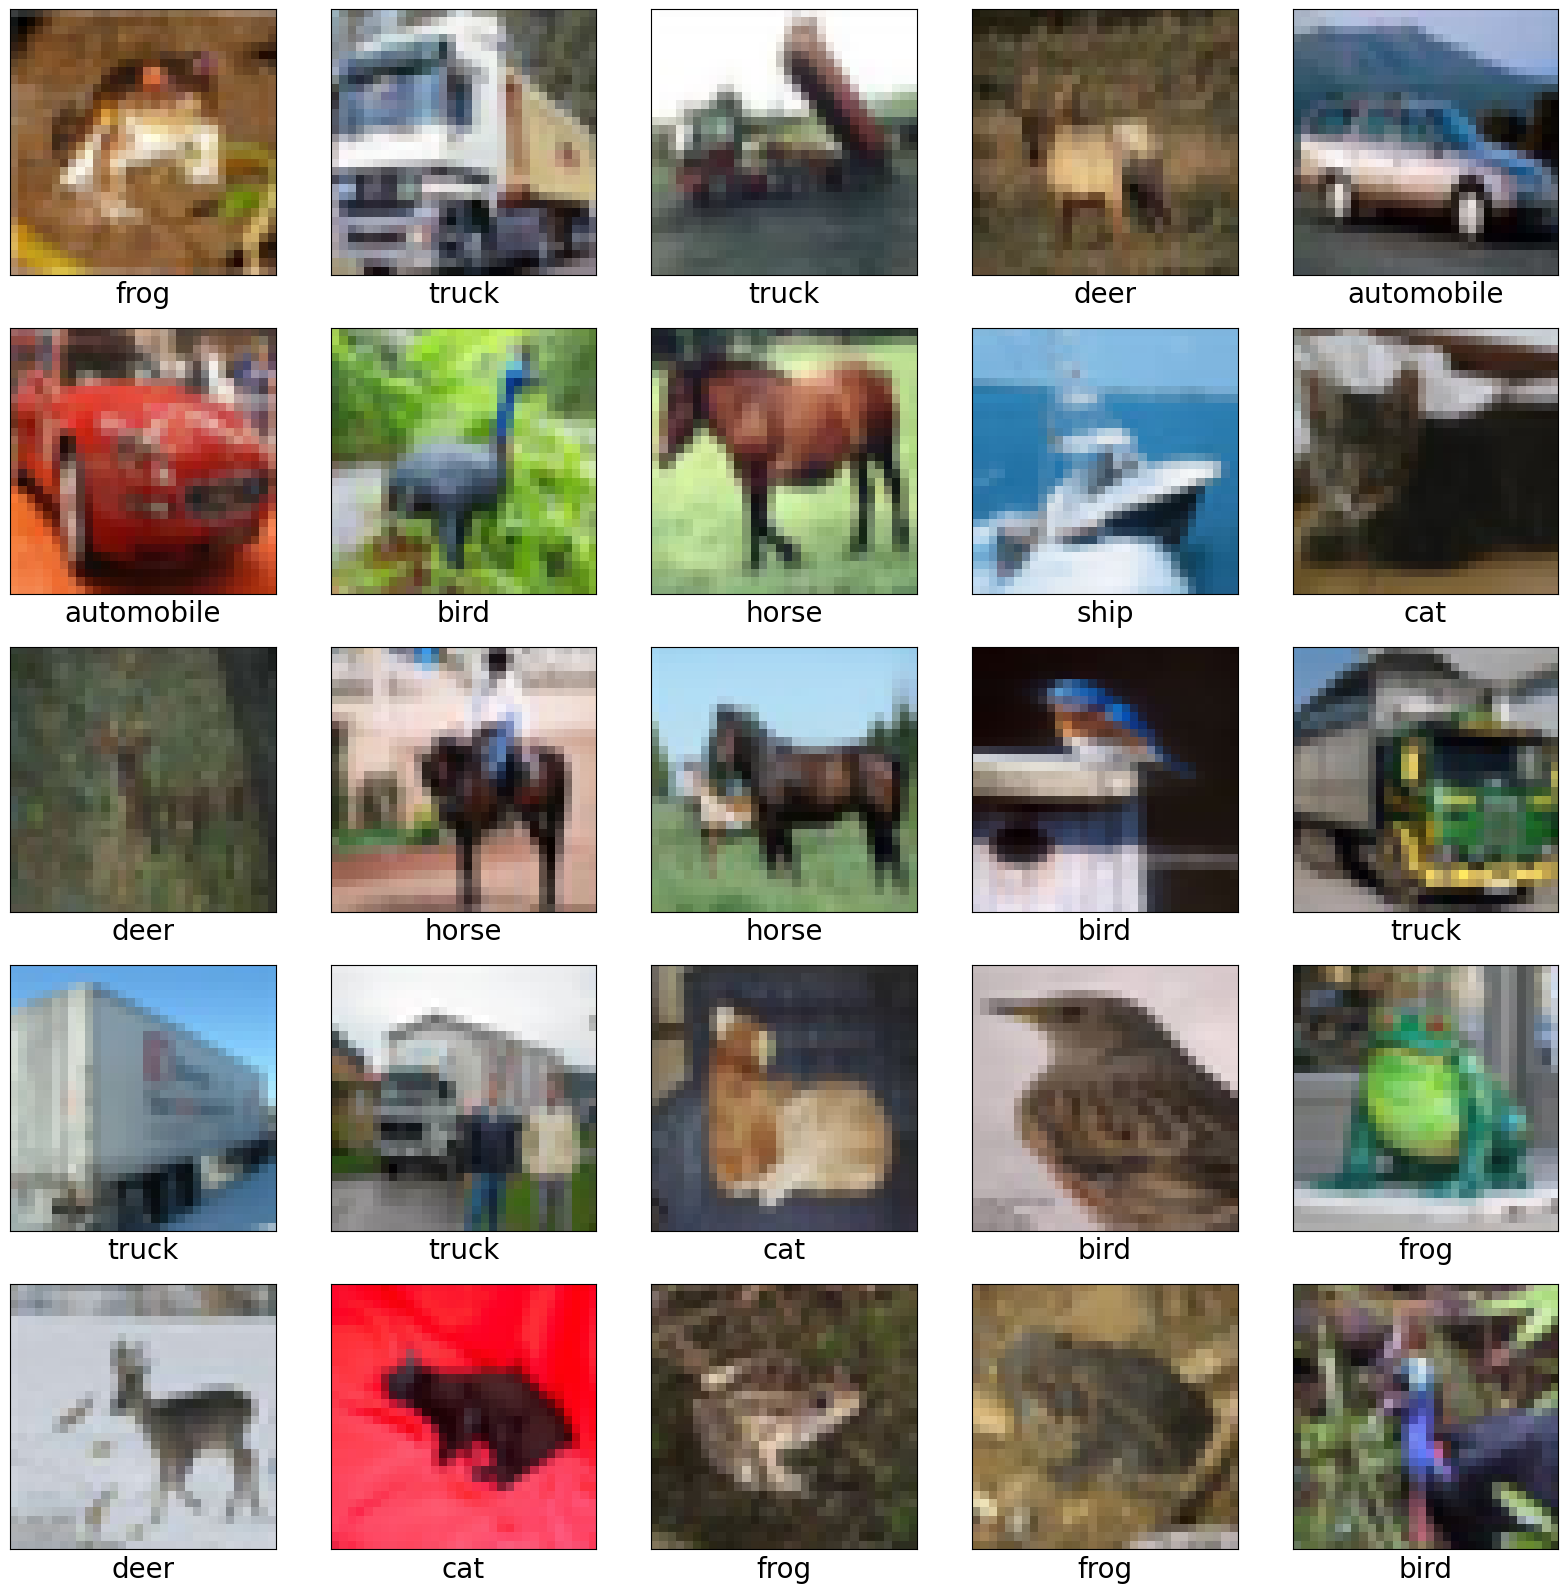

In [10]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why we would need the extra index
    plt.xlabel(class_names[train_labels[i][0]], fontsize = 20)

plt.show()

In [11]:
# Now!, We can proceed with the creation of the CNN model

model = Sequential(
    [
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu", input_shape = (32, 32, 3)),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10)
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [13]:
# TODO: 
# why there is any need in this world to compile the model?
# Which optimizer to choose and in which scenario?
# which loss to choose and it's applications?
# Why not trying out with different metrices of accuracy. Ref official doc

In [14]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.5325 - accuracy: 0.4427 - val_loss: 1.3152 - val_accuracy: 0.5208
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1651 - accuracy: 0.5880 - val_loss: 1.1766 - val_accuracy: 0.5805
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0167 - accuracy: 0.6426 - val_loss: 0.9784 - val_accuracy: 0.6550
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9210 - accuracy: 0.6769 - val_loss: 0.9644 - val_accuracy: 0.6618
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8447 - accuracy: 0.7031 - val_loss: 0.9314 - val_accuracy: 0.6749
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7801 - accuracy: 0.7268 - val_loss: 0.9119 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7279 - accuracy: 0.7429 - val_loss: 0.8610 -

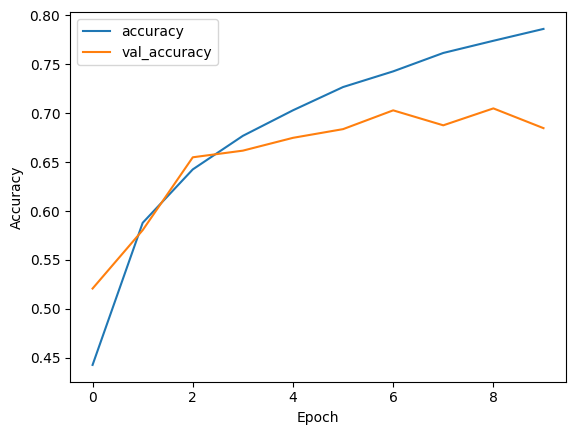

In [15]:
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc = "upper left")

[]

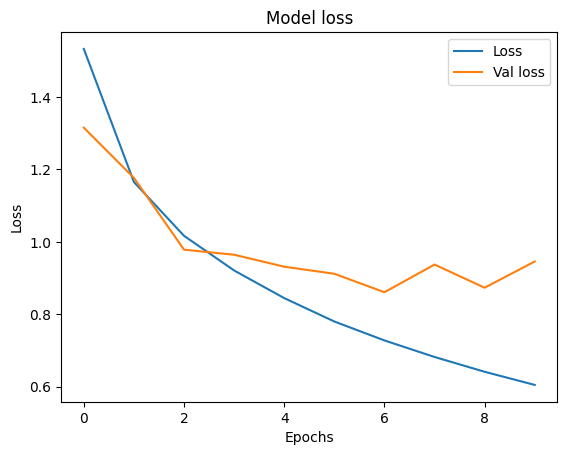

In [16]:
# TODO: Can also create a matplolib plot of losses
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Val loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Val loss"], loc = 'upper right')
plt.plot()

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 4s - loss: 0.9458 - accuracy: 0.6848 - 4s/epoch - 11ms/step


In [18]:
print(f"{round(test_acc * 100, 3) } %")

68.48 %


In [19]:
# TODO: classification report, Confusion matrix